# Even / Odd training empiar10311
N2N (Noise2Noise) denoising del volumen empiar11415. Utiliza 2 volúmenes $V_1$ y $V_2$, donde $V_1$ es el volumen formado por los slices Z pares "even" y $V_2$ es el volumen formado por los slices Z impares "odd".

Todos los ficheros temporales se crean en `/nas/vruiz/cryoCARE/empiar10311`.

In [1]:
# %pip install tensorflow==2.4

## Creamos $V_1$ y $V_2$

In [2]:
%run split_even_odd.ipynb

noisy.shape=(100, 1024, 1024)
Writing /nas/vruiz/cryoCARE/empiar10311/even.mrc
even.shape=(54, 1024, 1024)
Writing /nas/vruiz/cryoCARE/empiar10311/odd.mrc
odd.shape=(54, 1024, 1024)


## Configuramos cryoCARE

In [3]:
%%writefile /nas/vruiz/cryoCARE/empiar10311/train_data_config__evenodd.json
{
    "even": ["even.mrc"],
    "odd": ["odd.mrc"],
    "mask": [""],
    "patch_shape": [16, 16, 16],
    "num_slices": 360,
    "split": 0.9,
    "tilt_axis": "Y",
    "n_normalization_samples": 200,
    "path": "./even_odd_data",
    "overwrite": "True"  
}

Writing /nas/vruiz/cryoCARE/empiar10311/train_data_config__evenodd.json


In [4]:
%%bash
cd /nas/vruiz/cryoCARE/empiar10311
source ~/envs/cryoCARE/bin/activate
cryoCARE_extract_train_data.py --conf train_data_config__evenodd.json

2025-10-22 23:45:03.145870: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


even.data.shape=(54, 1024, 1024), sample_shape=[16, 16, 16]
Computing normalization parameters:


100%|██████████| 200/200 [00:00<00:00, 5864.40it/s]


## Entrenamos

In [5]:
%%writefile /nas/vruiz/cryoCARE/empiar10311/train_config__evenodd.json
{
  "train_data": "./even_odd_data",
  "epochs": 50,
  "steps_per_epoch": 200,
  "batch_size": 16,
  "unet_kern_size": 3,
  "unet_n_depth": 3,
  "unet_n_first": 16,
  "learning_rate": 0.0004,
  "model_name": "model",
  "path": "./",
  "gpu_id": [1]
}

Writing /nas/vruiz/cryoCARE/empiar10311/train_config__evenodd.json


In [6]:
%%bash
cd /nas/vruiz/cryoCARE/empiar10311
source ~/envs/cryoCARE/bin/activate
cryoCARE_train.py --conf train_config__evenodd.json

2025-10-22 23:45:54.243546: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2025-10-22 23:46:01.669447: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-10-22 23:46:01.684674: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2025-10-22 23:46:01.725022: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-10-22 23:46:01.726544: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: NVIDIA A30 computeCapability: 8.0
coreClock: 1.44GHz coreCount: 56 deviceMemorySize: 23.60GiB deviceMemoryBandwidth: 869.04GiB/s
2025-10-22 23:46:01.726706: I tensorflow/stream_executor/cuda/cuda_gpu_executor.c

Looking for GPU with ID: 1
GPU 1 successfully found
0 1
1 16
2 16
3 16
4 1
Epoch 1/50


2025-10-22 23:46:12.928824: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2025-10-22 23:46:33.060599: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2025-10-22 23:46:33.139906: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2025-10-22 23:46:34.083642: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2025-10-22 23:46:37.955790: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2025-10-22 23:47:10.144210: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:656] In AUTO-mode, and switching to DATA-based sharding, instead of FILE-based sharding 

200/200 [==============================] - 75s 97ms/step - loss: 0.7312 - mse: 0.7312 - mae: 0.6722 - val_loss: 0.6208 - val_mse: 0.6208 - val_mae: 0.6291
Epoch 2/50
200/200 [==============================] - 3s 15ms/step - loss: 0.5629 - mse: 0.5629 - mae: 0.5958 - val_loss: 0.6054 - val_mse: 0.6054 - val_mae: 0.6221
Epoch 3/50
200/200 [==============================] - 3s 15ms/step - loss: 0.5530 - mse: 0.5530 - mae: 0.5910 - val_loss: 0.6002 - val_mse: 0.6002 - val_mae: 0.6194
Epoch 4/50
200/200 [==============================] - 3s 15ms/step - loss: 0.5498 - mse: 0.5498 - mae: 0.5892 - val_loss: 0.5993 - val_mse: 0.5993 - val_mae: 0.6196
Epoch 5/50
200/200 [==============================] - 3s 14ms/step - loss: 0.5465 - mse: 0.5465 - mae: 0.5878 - val_loss: 0.5955 - val_mse: 0.5955 - val_mae: 0.6164
Epoch 6/50
200/200 [==============================] - 3s 14ms/step - loss: 0.5440 - mse: 0.5440 - mae: 0.5862 - val_loss: 0.5990 - val_mse: 0.5990 - val_mae: 0.6199
Epoch 7/50
200/200 [

## Inferimos

In [9]:
%%writefile /nas/vruiz/cryoCARE/empiar10311/predict_config__evenodd.json
{
    "path": "./model.tar.gz",
    "even": ["empiar10311_stack_crop.mrc"], 
    "odd": ["empiar10311_stack_crop.mrc"],
    "n_tiles": [1,1,1],
    "output": "even_odd_denoised",
    "overwrite": "True",
    "gpu_id": [1]
}

Overwriting /nas/vruiz/cryoCARE/empiar10311/predict_config__evenodd.json


In [10]:
%%bash
cd /nas/vruiz/cryoCARE/empiar10311
pwd
source ~/envs/cryoCARE/bin/activate
cryoCARE_predict.py --conf predict_config__evenodd.json || true

/nas/vruiz/cryoCARE/empiar10311


2025-10-22 23:51:28.253816: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2025-10-22 23:51:33.702407: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-10-22 23:51:33.703164: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2025-10-22 23:51:33.722725: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-10-22 23:51:33.724065: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: NVIDIA A30 computeCapability: 8.0
coreClock: 1.44GHz coreCount: 56 deviceMemorySize: 23.60GiB deviceMemoryBandwidth: 869.04GiB/s
2025-10-22 23:51:33.724132: I tensorflow/stream_executor/cuda/cuda_gpu_executor.c

Looking for GPU with ID: 1
GPU 1 successfully found
Loading network weights from 'weights_best.h5'.
(104, 1024, 1024, 1)
Out of memory, retrying with n_tiles = (1, 1, 2, 1)


100%|██████████| 2/2 [00:05<00:00,  2.68s/it]    


['NEWSTACK: Images copied                                  6-May-22  11:43:36     '
 'NEWSTACK: Images copied                                  6-May-22  11:46:44     '
 '' '' '' '' '' ''
 'cryoCARE                                                22-Oct-25  23:52:35     '
 '']


In [11]:
import mrcfile
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [12]:
def read_MRC(path_file):
    return mrcfile.read(mrc_file_path)

In [13]:
mrc_file_path = '/nas/vruiz/cryoCARE/empiar10311/empiar10311_stack_crop.mrc'
original_volume = read_MRC(mrc_file_path)

In [14]:
original_volume.shape

(100, 1024, 1024)

In [15]:
mrc_file_path = '/nas/vruiz/cryoCARE/empiar10311/even_odd_denoised/empiar10311_stack_crop.mrc'
denoised_volume = read_MRC(mrc_file_path)

In [16]:
denoised_volume.shape

(100, 1024, 1024)

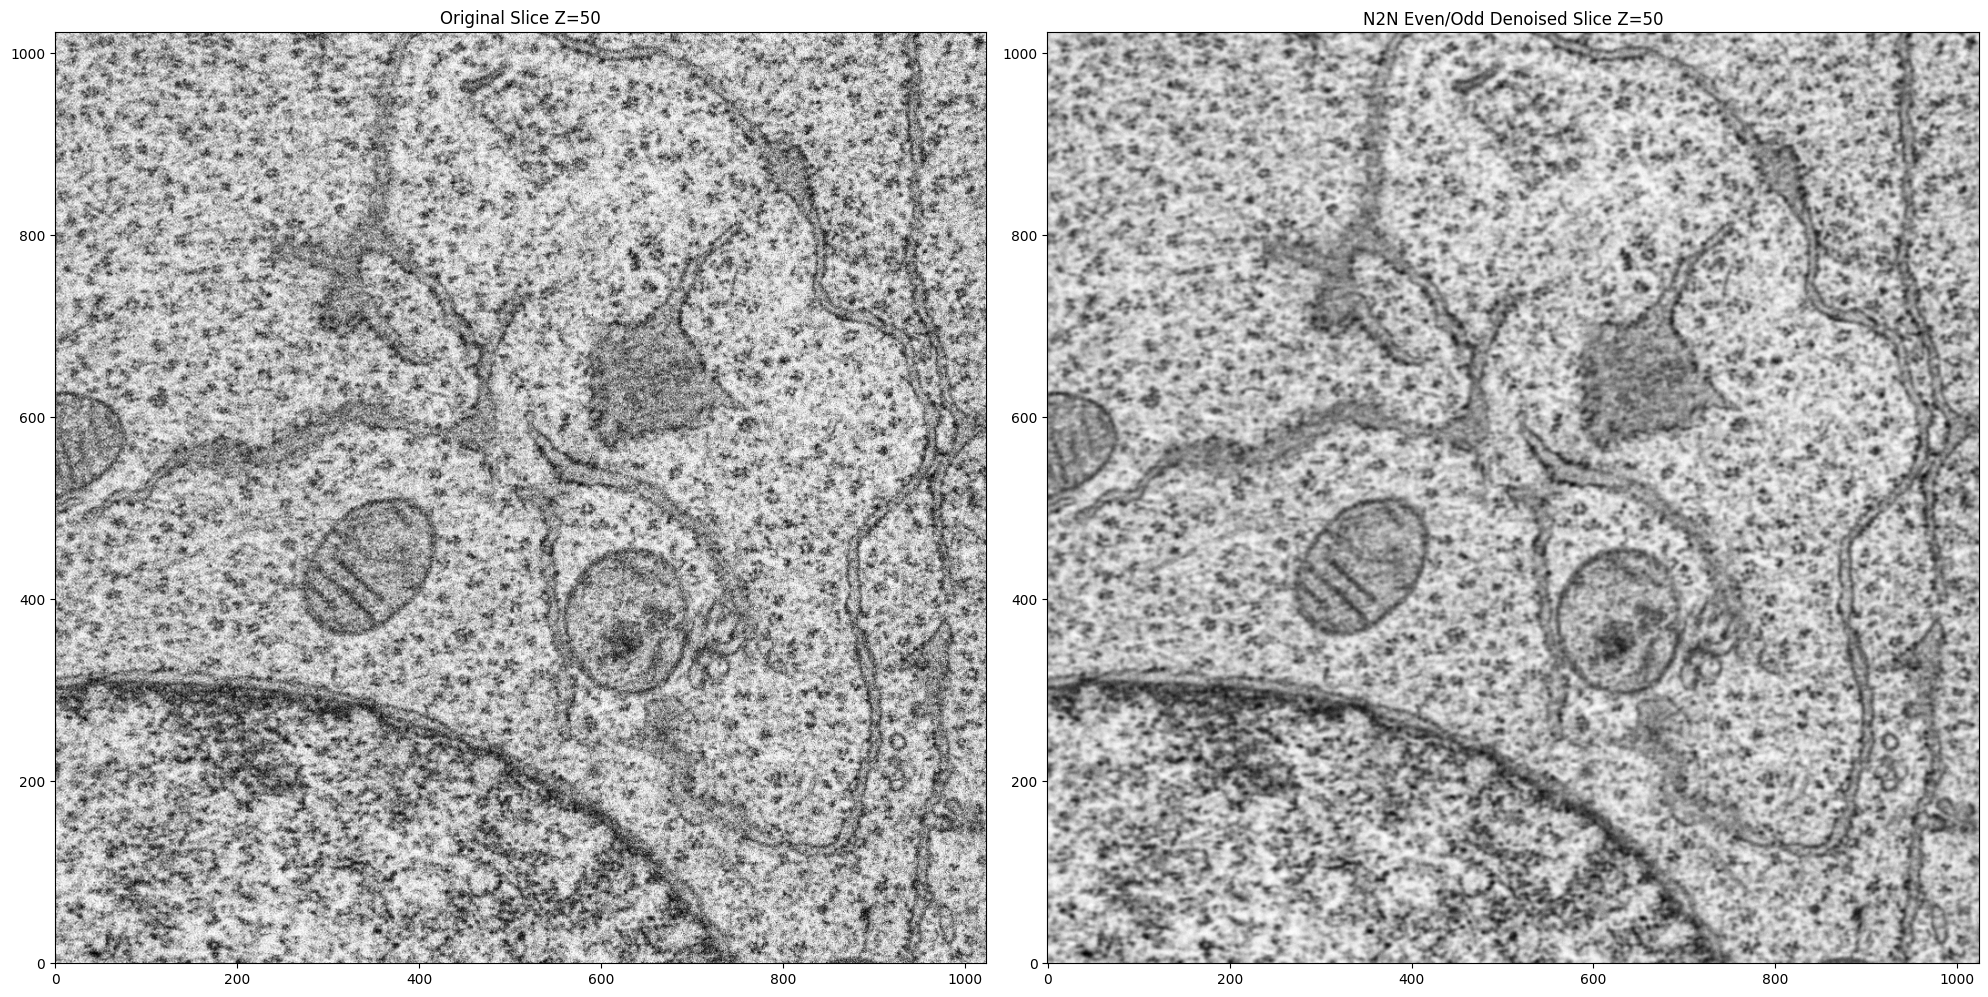

In [17]:
# Choose a slice index in the middle of the volume for a good comparison
slice_idx = original_volume.shape[0] // 2

fig, axes = plt.subplots(1, 2, figsize=(20, 20))

# Plot the original slice z
im1 = axes[0].imshow(original_volume[slice_idx, :, :].T, cmap='gray', origin='lower')
axes[0].set_title(f'Original Slice Z={slice_idx}')
axes[0].grid(False)

# Plot the original slice z+1
im2 = axes[1].imshow(denoised_volume[slice_idx, :, :].T, cmap='gray', origin='lower')
axes[1].set_title(f'N2N Even/Odd Denoised Slice Z={slice_idx}')
axes[1].grid(False)

plt.tight_layout()
plt.show()

In [18]:
%pip install "self_fourier_shell_correlation @ git+https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation"

  Cloning https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation to /tmp/pip-install-hsunilp2/self-fourier-shell-correlation_b02beb305a7149a29f03bbbb6a0a0322
  Running command git clone --filter=blob:none --quiet https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation /tmp/pip-install-hsunilp2/self-fourier-shell-correlation_b02beb305a7149a29f03bbbb6a0a0322
  Resolved https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation to commit f785ed2aa883d5362036cc66d26498286c9a48ff
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [19]:
%pip show self_fourier_shell_correlation

Name: self_fourier_shell_correlation
Version: 0.0.1
Summary: Self Fourier shell correlation (https://www.nature.com/articles/s42003-023-05724-y)
Home-page: https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation
Author: 
Author-email: "Eric J. Verbeke" <ev9102@princeton.edu>, Vicente González Ruiz <vicente.gonzalez.ruiz@gmail.com>
License: 
Location: /nas/vruiz/envs/cryoCARE/lib/python3.8/site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [20]:
import sys
print(sys.executable)

/home/jupyter-vruiz/envs/cryoCARE/bin/python


In [21]:
%pip install "shuffling @ git+https://github.com/vicente-gonzalez-ruiz/shuffling"

  Cloning https://github.com/vicente-gonzalez-ruiz/shuffling to /tmp/pip-install-aobjfvpm/shuffling_e02aef0319ec46ad853ff0f19a19cf2a
  Running command git clone --filter=blob:none --quiet https://github.com/vicente-gonzalez-ruiz/shuffling /tmp/pip-install-aobjfvpm/shuffling_e02aef0319ec46ad853ff0f19a19cf2a
  Resolved https://github.com/vicente-gonzalez-ruiz/shuffling to commit 0710ed80bd40725b8fd116352c8e58a97f96528b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [22]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [23]:
%pip install "motion_estimation @ git+https://github.com/vicente-gonzalez-ruiz/motion_estimation"

  Cloning https://github.com/vicente-gonzalez-ruiz/motion_estimation to /tmp/pip-install-56xcrouc/motion-estimation_1a0ca970a03e47cc9cfb41e3747dba41
  Running command git clone --filter=blob:none --quiet https://github.com/vicente-gonzalez-ruiz/motion_estimation /tmp/pip-install-56xcrouc/motion-estimation_1a0ca970a03e47cc9cfb41e3747dba41
  Resolved https://github.com/vicente-gonzalez-ruiz/motion_estimation to commit 9440bc666fda3cb80363395be00f0044bf49a426
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [24]:
from self_fourier_shell_correlation import fsc_utils as fsc

In [25]:
import mrcfile

In [26]:
import matplotlib.pyplot as plt

In [27]:
even = mrcfile.read("/nas/vruiz/cryoCARE/empiar10311/even.mrc")

In [28]:
odd = mrcfile.read("/nas/vruiz/cryoCARE/empiar10311/odd.mrc")

In [29]:
spatial_freq, fsc_values = fsc.fourier_shell_correlation(even, odd, shell_thickness=0.01)

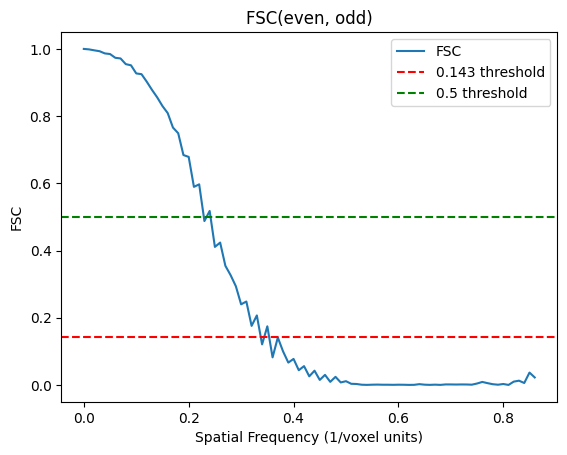

In [30]:
fsc.plot_fsc(spatial_freq, fsc_values, "Spatial Frequency (1/voxel units)", "FSC", "FSC(even, odd)")